In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import corner

import arviz as az

In [121]:


trace_file = 'trace.nc'



fin = '../results/test_mock_chimera_3'



trace_name = os.path.join(fin, trace_file)

trace_name


'../results/test_mock_chimera_3/trace.nc'

In [122]:
PLPeakO3params = {'alpha': 3.4,
 'beta': 1.1,
 'mh': 87,
 'ml': 5.1,
 'lambdaPeak': 0.039,
 'muMass': 34,
 'sigmaMass': 3.6,
 'deltam': 4.8,
 
  'gamma':2.7,    
'kappa':3., 
    'zp':2.,
  
                  
    'H0': 70,
     'Om': 0.25,
                     }

names = ['H0', 'gamma',  'kappa', 'zp', 'lambdaPeak', 'alpha', 'beta', 'deltam', 'ml', 'mh', 'muMass', 'sigmaMass',
 ]

truths = [ PLPeakO3params[k] for k in names ]

In [123]:
trace = az.from_netcdf(trace_name)

In [124]:
trace

Inference data with groups:
	> posterior
	> sample_stats

In [125]:
az.summary( trace, var_names=names ).round(2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
H0           57.20  19.31   25.78    92.60       2.55     1.92      64.0   
gamma         3.50   2.01    1.34     8.07       0.34     0.24      33.0   
kappa         2.56   1.69    0.39     5.45       0.44     0.32      15.0   
zp            1.30   1.07    0.25     3.67       0.30     0.22      22.0   
lambdaPeak    0.06   0.03    0.02     0.10       0.00     0.00      35.0   
alpha         3.32   0.24    2.76     3.67       0.03     0.02      64.0   
beta          1.72   0.48    0.79     2.49       0.09     0.06      32.0   
deltam        4.63   2.64    1.00     8.73       0.43     0.32      25.0   
ml            5.52   1.02    3.80     7.21       0.19     0.13      31.0   
mh          126.12  26.33   85.02   170.86       4.09     2.92      40.0   
muMass       37.13   2.74   31.08    40.98       0.34     0.24      64.0   
sigmaMass     4.50   1.24    3.10     6.99       0.16     0.11      64.0   

            ess_tail  r_hat  
H0              21.0   1.02  
gamma           50.0   1.00  
kappa           17.0   1.15  
zp              22.0   1.11  
lambdaPeak      38.0   1.04  
alpha           19.0   0.96  
beta            50.0   1.02  
deltam          28.0   1.05  
ml              50.0   1.00  
mh              22.0   0.99  
muMass          21.0   1.06  
sigmaMass       44.0   0.97

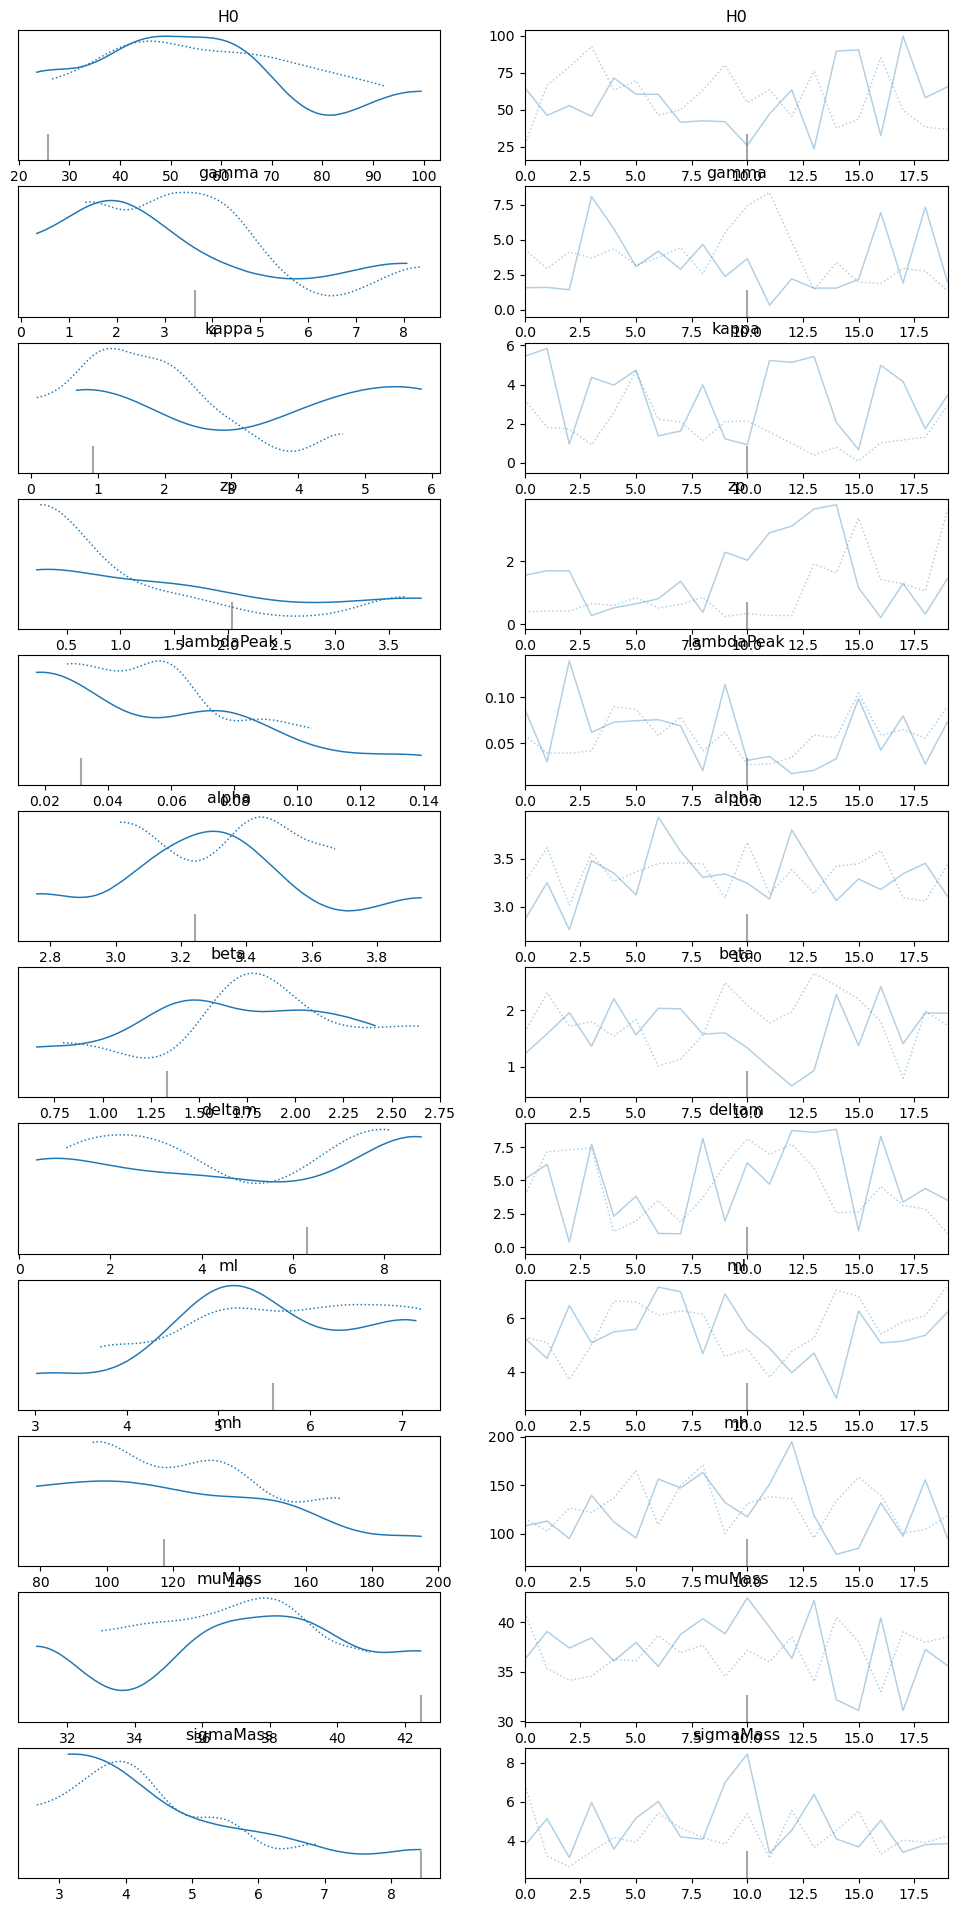

In [126]:
az.plot_trace(trace, 
              combined=False,
              var_names=names, 
              lines=[]
             );

plt.savefig(os.path.join(fin, 'trace_plot.pdf'), bbox_inches='tight')

plt.show()

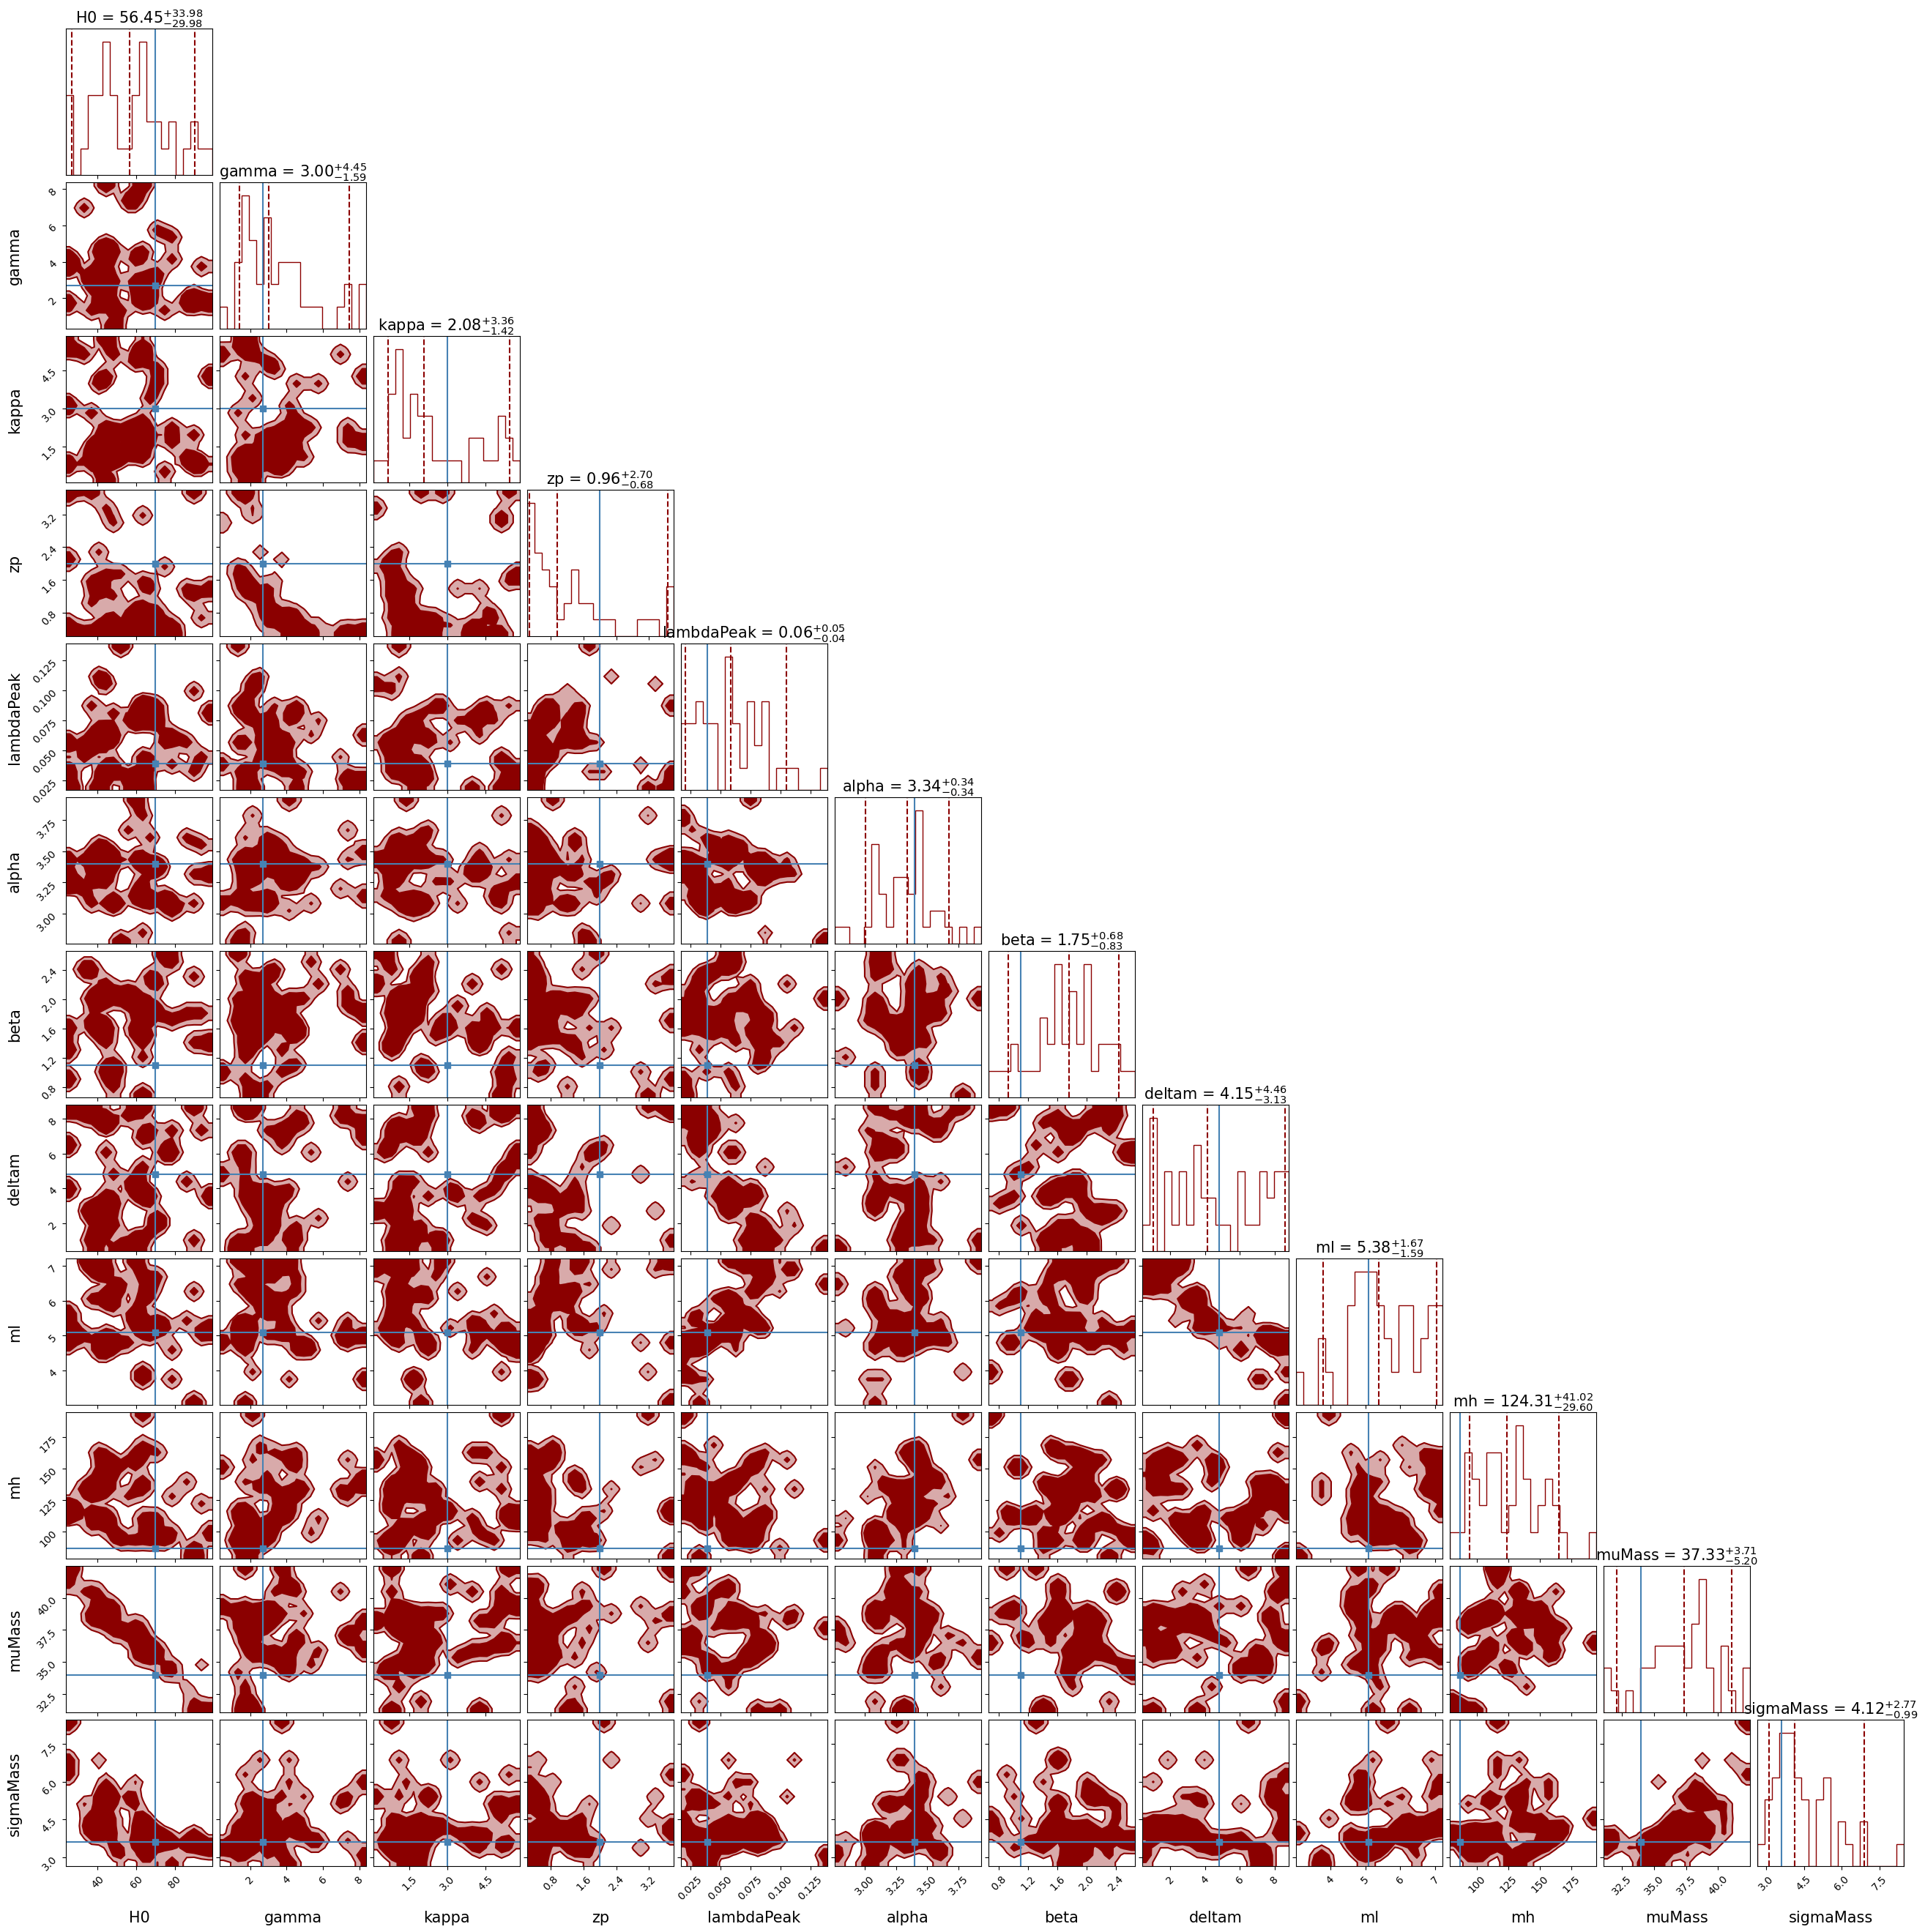

In [127]:
_ = corner.corner(
    trace,
    var_names=names,
    labels=names,  
    truths=truths,
    color='darkred',
    plot_points=False,
    levels=[0.68, 0.90],
    show_titles=True, 
    title_kwargs={"fontsize": 15, }, label_kwargs={"fontsize": 15},
    density=True,
    smooth=0.9, 
    fill_contours=True,
     bins=20, 
    title_fmt='.2f', 
    hist_bin_factor=1,
    quantiles=[0.05, 0.5, 0.95],
    #range=rr
)

#plt.savefig(os.path.join(in_dir, fname_2+'_corner.pdf'), bbox_inches='tight')

plt.savefig(os.path.join(fin, 'corner.pdf'), bbox_inches='tight')

plt.show()

In [128]:
stacked = az.extract(trace)
#stacked

In [129]:
allchains = np.asarray([ stacked[name].values for name in names])
allchains.shape

(12, 40)

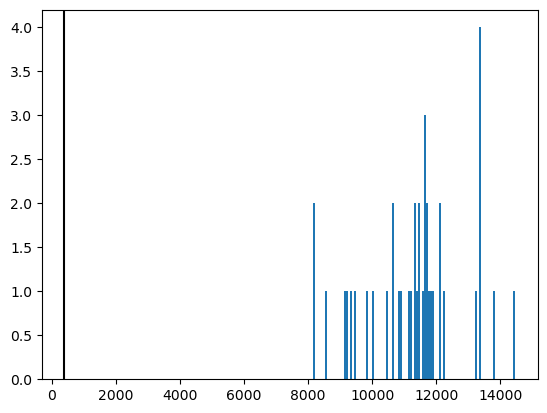

In [130]:

_ = plt.hist( np.squeeze(np.asarray([ stacked['Neff'].values ])), bins=100) #np.geomspace(1e02,1e05,100))
#plt.xscale('log')
plt.axvline(4*100, color='k')
plt.savefig(os.path.join(fin, 'Neff.pdf'), bbox_inches='tight')

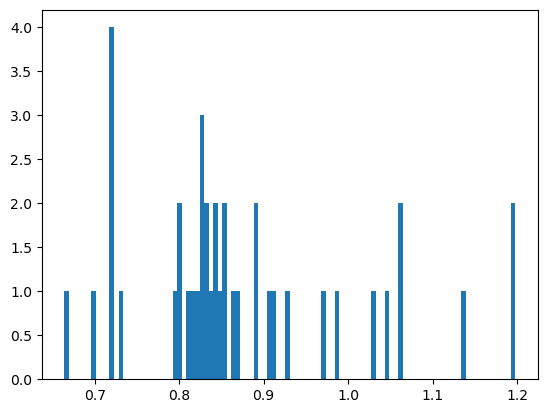

In [131]:
_ = plt.hist( np.squeeze(np.asarray([ stacked['log_lik_var'].values ])), bins=100) #np.geomspace(1e02,1e05,100))
#plt.xscale('log')
#plt.axvline(4*100, color='k')
plt.savefig(os.path.join(fin, 'log_lik_var.pdf'), bbox_inches='tight')

### Plot with MCMC with emcee

In [132]:
## MCMC samples

import h5py

def read_chain(data_path):

    with h5py.File(os.path.join(data_path, 'chain_final_clean.h5'), 'r') as inp:
        samples = np.array(inp['chain'])
        weights = np.array(inp['weights'])
    return samples, weights



In [133]:
fin = '/Users/Michi/Library/CloudStorage/Dropbox/Local/Physics_projects/MGCosmoPop/results/CHIMERAtests/run_CHIMERA_O5_noiseless_snrth-25_100evsample_injections_20M_plpv9_v1'

In [134]:
samples, weights = read_chain(fin)

print('Samples loaded from %s' %os.path.join(fin, 'chain_final_clean.h5'))

Samples loaded from /Users/Michi/Library/CloudStorage/Dropbox/Local/Physics_projects/MGCosmoPop/results/CHIMERAtests/run_CHIMERA_O5_noiseless_snrth-25_100evsample_injections_20M_plpv9_v1/chain_final_clean.h5


In [135]:

samples.shape

(2940, 12)

In [136]:
allchains = np.asarray([ stacked[name].values for name in names])
allchains.shape

(12, 40)

In [137]:
names

['H0',
 'gamma',
 'kappa',
 'zp',
 'lambdaPeak',
 'alpha',
 'beta',
 'deltam',
 'ml',
 'mh',
 'muMass',
 'sigmaMass']

In [138]:
myrange = [  ( min( allchains[i].min(), samples[:, i].min() ), 
              max( allchains[i].max(), samples[:, i].max() ) ) for i in range(len(names)) ]

myrange

[(10.556612564646215, 146.88288427938693),
 (0.0008648682401846131, 11.950719093897629),
 (0.000541464282784565, 5.999987083438681),
 (0.0015913123342488067, 3.9999825940309743),
 (0.010481896532875797, 0.23266354679617268),
 (2.4025535335009014, 4.163389496826415),
 (0.3615239253663436, 3.8512473195736474),
 (0.015372831689054678, 9.936068354176392),
 (2.3579601776701296, 7.521931971380651),
 (64.92604780818368, 199.97002300122767),
 (27.236804388855848, 48.35680882987986),
 (1.9928905779824801, 9.669949740004274)]

In [139]:
len(names), len(samples)

(12, 2940)

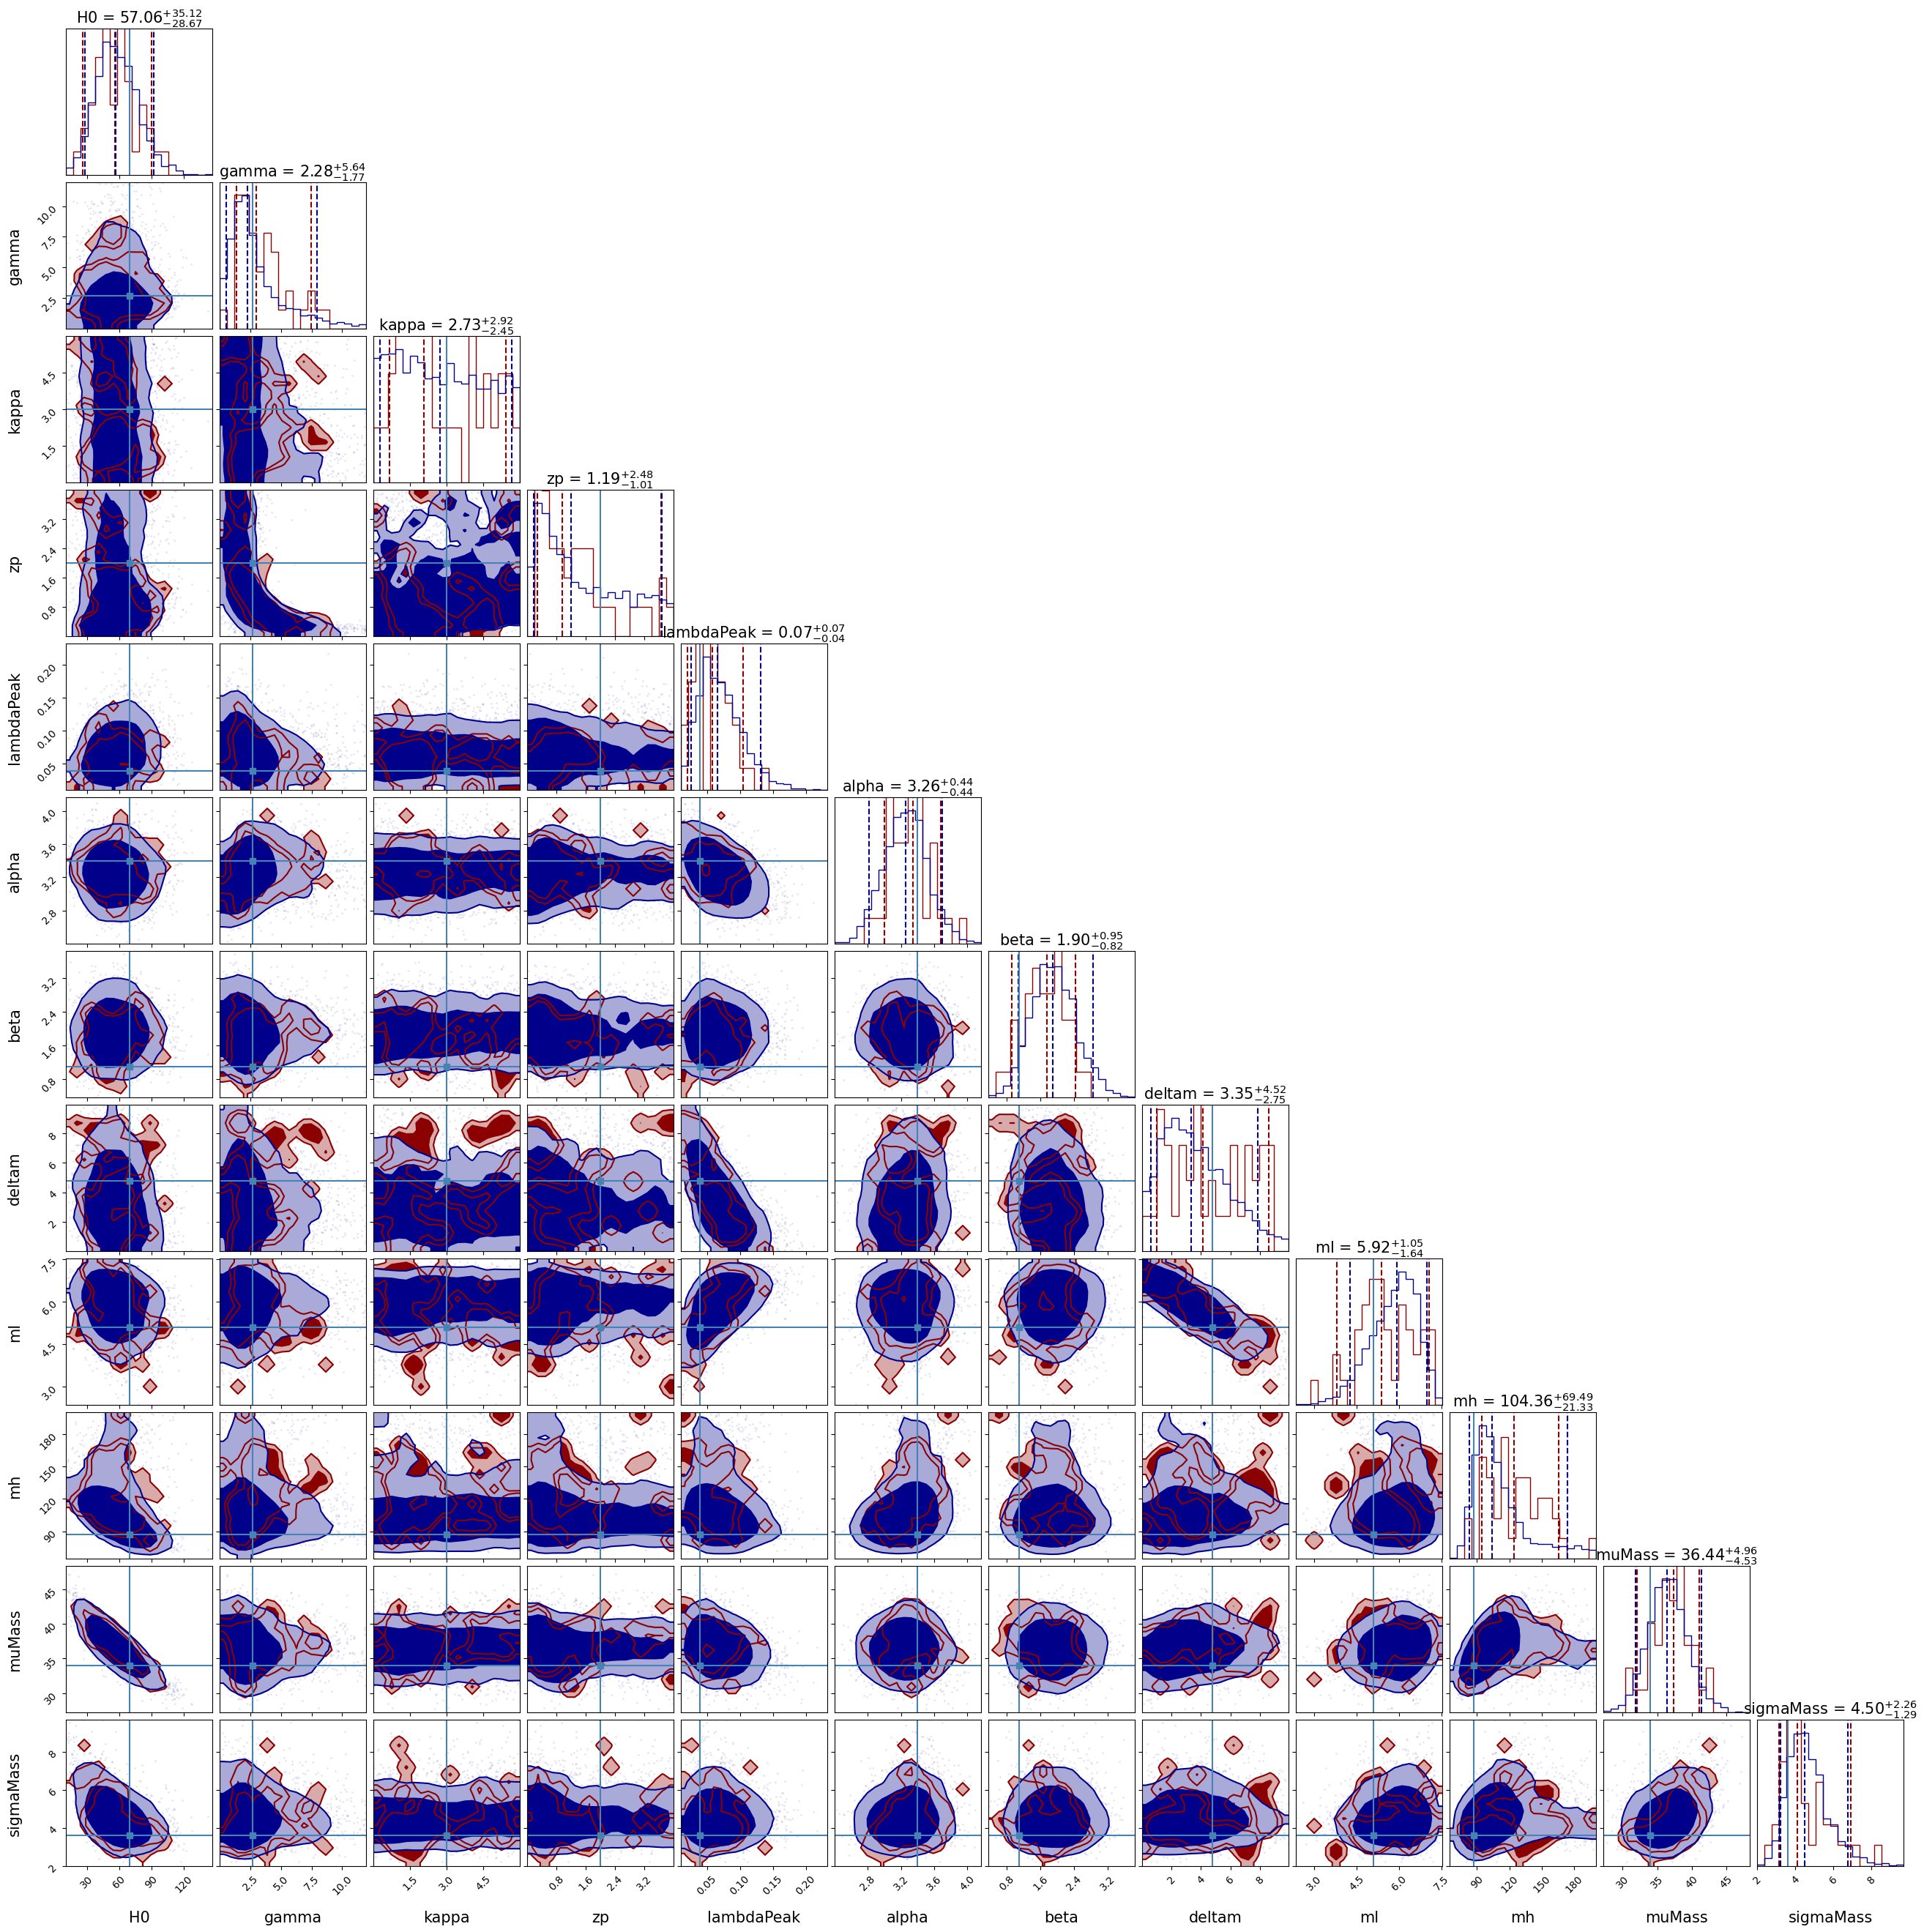

In [140]:
figure = corner.corner(
    #allchains.T,
    trace,
    var_names=names,
    labels=names,  
    #truths=truths,
    color='darkred',
    plot_points=True,
    levels=[0.68, 0.90],
    show_titles=True, 
    title_kwargs={"fontsize": 15, }, label_kwargs={"fontsize": 15},
    density=True,
    smooth=0.9, 
    fill_contours=True,
     bins=20, 
    title_fmt='.2f', 
    hist_bin_factor=1,
    quantiles=[0.05, 0.5, 0.95],
    range=myrange,
    #weights=np.ones(allchains.shape[-1])/allchains.shape[-1]*len(samples_load)
    
)

fig = corner.corner(
    samples,
    fig=figure,
    #var_names=names,
    labels=names,  
    truths=truths,
    color='darkblue',
    plot_points=False,
    levels=[0.68, 0.90],
    show_titles=True, 
    title_kwargs={"fontsize": 15, }, label_kwargs={"fontsize": 15},
    density=True,
    smooth=0.9, 
    fill_contours=True,
     bins=20, 
    title_fmt='.2f', 
    hist_bin_factor=1,
    quantiles=[0.05, 0.5, 0.95],
    range=myrange,
    weights=np.ones( len(samples))/len(samples)*allchains.shape[-1] 
)

#plt.savefig(os.path.join(in_dir, fname_2+'_corner.pdf'), bbox_inches='tight')

plt.savefig(os.path.join(fin, 'corner_with_emcee.pdf'), bbox_inches='tight')

plt.show()